# Astronomical Survey Data

*N. Hernitschek, 2022*

This is the second Jupyter notebook for **ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)**. 
This Jupyter notebook prepares for accessing and plotting data from astronomical surveys.

It is based on code from the textbook

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray.

***Exercises required for class participation are in <font color='red'>red</font>.***

---
## Contents
* [Accessing SDSS Photometry with AstroML](#first-bullet)
* [Accessing SDSS Spectroscopy with AstroML](#second-bullet)
* [Summary](#third-bullet)

## 1. Accessing SDSS Photometry with AstroML <a class="anchor" id="first-bullet"></a>


Much of the data made available by `astroML` comes from the Sloan Digital Sky Survey (SDSS), a decade-plus photometric and spectroscopic survey at the Apache Point Observatory in New Mexico. The survey obtained photometry for hundreds of millions of stars, quasars, and galaxies, and spectra for several million of these objects. In addition, the second phase of the survey performed repeated imaging over a small portion of the sky, called Stripe 82, enabling the study of the time-variation of many objects.

SDSS photometric data are observed through five filters, u, g, r, i, and z.

The photometric data can be accessed directly using the SQL interface to the SDSS Catalog Archive Server (CAS). In addition, `astroML` contains a function which accesses this data directly using a Python SQL query tool. The function in the code below is `fetch_imaging_sample()`, retrieving SDSS data sets available with a simple Python command.

The r vs. g-r color-magnitude diagrams and the r-i vs. g-r color-color diagrams for galaxies (left column) and stars (right column) from the SDSS imaging catalog. Only the first 5000 entries for each subset are shown in order to minimize the blending of points.

c:\users\jtsen\appdata\local\programs\python\python37-32\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


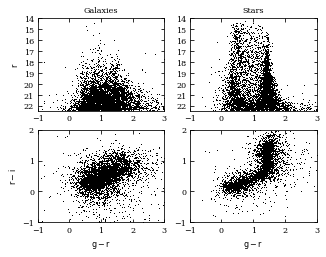

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_imaging_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample()

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies


def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none', marker=',')

    fig = plt.figure(figsize=(5, 3.75))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
plt.show()


### <font color='red'>SDSS Stripe 82 Standard Stars</font>

Here we plot the g-r vs. r-i color-color diagram for the first 10,000 entries in the Stripe 82 Standard Star Catalog. The region with the highest point density is dominated by main sequence stars. The thin extension toward the lower-left corner is dominated by the so-called blue horizontal branch stars and white dwarf stars.

<font color='red'>In addition to the g-r vs. r-i color-color diagram, plot the g-r vs i-z diagram.</font>



c:\users\jtsen\appdata\local\programs\python\python37-32\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


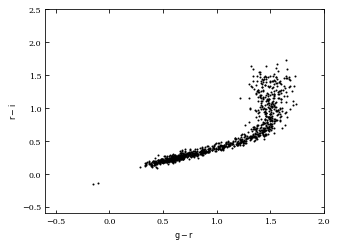

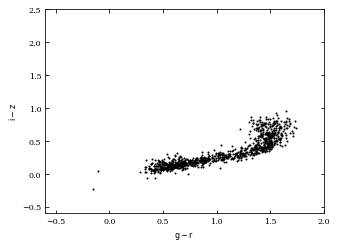

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch the stripe 82 data
data = fetch_sdss_S82standards()

# select the first 10000 points
data = data[:1000]

# select the mean magnitudes for g, r, i
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']
z = data['mmu_z']

#------------------------------------------------------------
# Plot the g-r vs r-i colors
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(g - r, r - i, marker='.', markersize=2,
        color='black', linestyle='none')

ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

plt.show()

#------------------------------------------------------------
# Plot the g-r vs i-z colors
fig, ax = plt.subplots(figsize=(5, 3.75))

ax.plot(g - r, i - z, marker='.', markersize=2,
       color='black', linestyle='none')



ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm i - z}$')

plt.show()

### <font color='red'>SDSS Data Release 7 Quasar catalog</font>

The SDSS has obtained the spectra of over 100,000 distant quasars. The quasar catalog is described on the SDSS website, and can be downloaded using the function fetch_dr7_quasar().

The code below demonstrates how to fetch and visualize the colors from the SDSS DR7 quasar sample and make a density plot.
Density plots are an imporant tool for visualization of large data sets.

<font color='red'>Compare the plot to a simple scatter plot.</font>

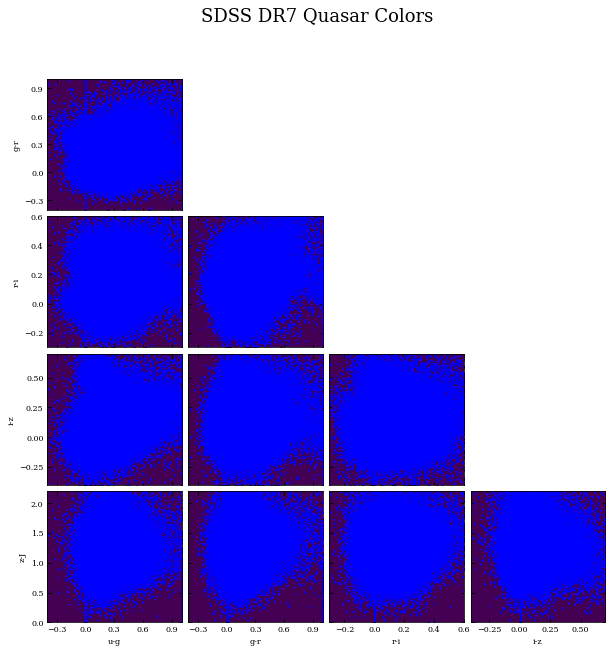

In [2]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

from astroML.plotting import MultiAxes
from astroML.datasets import fetch_dr7_quasar

data = fetch_dr7_quasar()

colors = np.empty((len(data), 5))

colors[:, 0] = data['mag_u'] - data['mag_g']
colors[:, 1] = data['mag_g'] - data['mag_r']
colors[:, 2] = data['mag_r'] - data['mag_i']
colors[:, 3] = data['mag_i'] - data['mag_z']
colors[:, 4] = data['mag_z'] - data['mag_J']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J']

bins = [np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.3, 0.6, 100),
        np.linspace(-0.4, 0.7, 100),
        np.linspace(0, 2.2, 100)]

ax = MultiAxes(5, wspace=0.05, hspace=0.05,
               fig=plt.figure(figsize=(10, 10)))

#density plot
ax.density(colors, bins)

#simple scatter plot
ax.plot(colors, bins,marker='.', markersize=2,
       color='blue', linestyle='none')


ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS DR7 Quasar Colors', fontsize=18)

plt.show()

We now plot standard stars and QSOs in one plot. This shows how much astronomical colors help in discriminating between different types of objects.

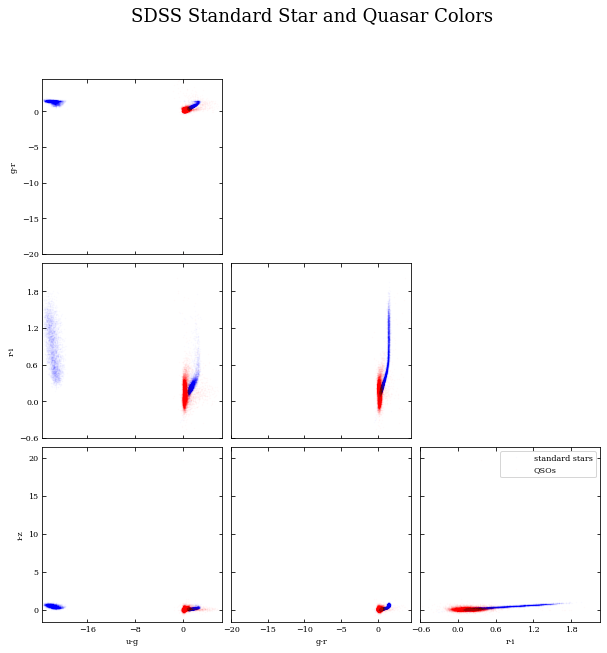

In [3]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

from astroML.plotting import MultiAxes
from astroML.datasets import fetch_dr7_quasar

data_qso = fetch_dr7_quasar()

# Fetch the stripe 82 data
data_stars = fetch_sdss_S82standards()

# select the first 10000 points
data_stars = data_stars[:10000]

data_qso = data_qso[:10000]

colors_stars = np.empty((len(data_stars), 4))


colors_stars[:, 0] = data_stars['mmu_u'] - data_stars['mmu_g']
colors_stars[:, 1] = data_stars['mmu_g'] - data_stars['mmu_r']
colors_stars[:, 2] = data_stars['mmu_r'] - data_stars['mmu_i']
colors_stars[:, 3] = data_stars['mmu_i'] - data_stars['mmu_z']


colors_qso = np.empty((len(data_qso), 4))

colors_qso[:, 0] = data_qso['mag_u'] - data_qso['mag_g']
colors_qso[:, 1] = data_qso['mag_g'] - data_qso['mag_r']
colors_qso[:, 2] = data_qso['mag_r'] - data_qso['mag_i']
colors_qso[:, 3] = data_qso['mag_i'] - data_qso['mag_z']


labels = ['u-g', 'g-r', 'r-i', 'i-z']

ax = MultiAxes(4, wspace=0.05, hspace=0.05,
               fig=plt.figure(figsize=(10, 10)))


# as the density plots cannot be combined, we here use an alpha value to make the data points more transparent

ax.plot(colors_stars,marker='.', markersize=2,
        color='blue',alpha=0.01, linestyle='none',label='standard stars')

ax.plot(colors_qso,marker='.', markersize=2,
        color='red', alpha=0.01,linestyle='none',label='QSOs')


ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS Standard Star and Quasar Colors', fontsize=18)
plt.legend()
plt.show()

## 2. Accessing SDSS Spectroscopy with AstroML <a class="anchor" id="second-bullet"></a>

The SDSS spectroscopic data is available as individual FITS files, indexed by three numbers: the plate, date, and fiber number. The fetch_sdss_spectrum() takes a plate, mjd, and fiber, sends a query to the SDSS server for the given plate, fiber, and mjd, downloads the spectrum to the disk, and plots the result.

This example shows how to fetch a spectrum from the SDSS database using the plate, MJD, and fiber numbers, and how to visualize it. 

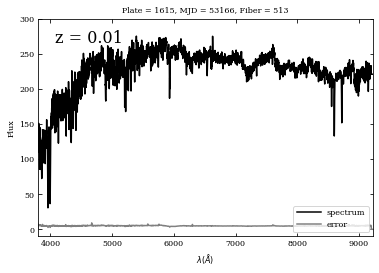

In [4]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()


### <font color='red'>SDSS Spectroscopic Sample</font>

Along with spectra, SDSS catalogued photometric observations of the objects in the survey area. Those objects with both spectra and photometry available provide a wealth of information about many classes of objects in the night sky. The photometry from the SDSS spectroscopic galaxy sample is available using the routine fetch_sdss_specgals(), and some of the attributes are shown in the following visualization.

The Mollweide projection is an equal-area, pseudocylindrical map projection generally used for global maps of the world or night sky. The [matplotlib documentation](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/geo_demo.html) gives a range of possible projections.

<font color='red'>We can try out different projection, e.g. the Lambert projection.</font>

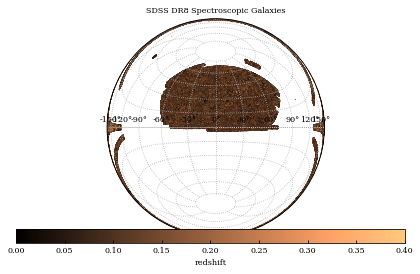

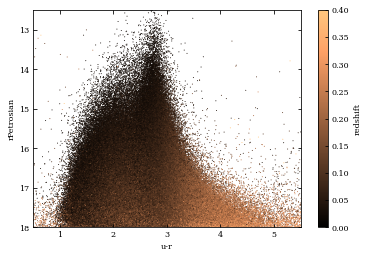

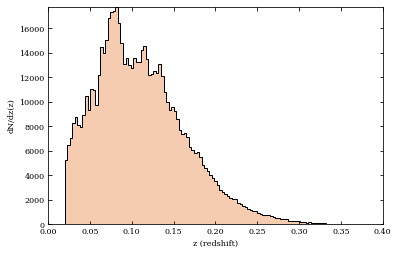

In [5]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import hist

from astroML.datasets import fetch_sdss_specgals

data = fetch_sdss_specgals()

#------------------------------------------------------------
# plot the RA/DEC in an area-preserving projection

RA = data['ra']
DEC = data['dec']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

#ax = plt.axes(projection='mollweide')

ax = plt.axes(projection='lambert')



ax.grid()
plt.scatter(RA, DEC, s=1, lw=0, c=data['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)

plt.title('SDSS DR8 Spectroscopic Galaxies')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.4, 9))
cb.set_label('redshift')


#------------------------------------------------------------
# plot the r vs u-r color-magnitude diagram
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

plt.figure()
ax = plt.axes()
plt.scatter(u - r, rPetro, s=1, lw=0, c=data['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)
plt.colorbar(ticks=np.linspace(0, 0.4, 9)).set_label('redshift')

plt.xlim(0.5, 5.5)
plt.ylim(18, 12.5)

plt.xlabel('u-r')
plt.ylabel('rPetrosian')

#------------------------------------------------------------
# plot a histogram of the redshift

plt.figure()
hist(data['z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlim(0, 0.4)
plt.xlabel('z (redshift)')
plt.ylabel('dN/dz(z)')

plt.show()


One well-known feature of the SDSS spectroscopic sample is the “great wall”, a filament of galaxies located several hundred megaparsecs away. The great wall data is among the spectroscopic sample: to enable easily working with it, astroML contains the function fetch_great_wall(). The data can be seen below:

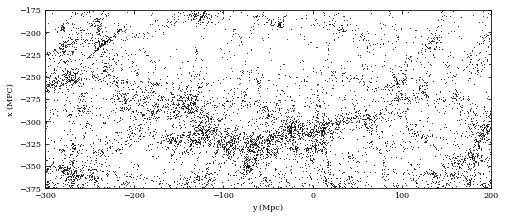

In [6]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_great_wall
from astroML.density_estimation import KNeighborsDensity

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 4))

# First plot: scatter the points
ax = plt.subplot(111, aspect='equal')
ax.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')

ax.set_xlim(-300, 200)
ax.set_ylim(-375, -175)

ax.set_xlabel('y (Mpc)')
ax.set_ylabel('x (MPC)')

plt.show()

## Summary <a class="anchor" id="third-bullet"></a>

At this point, all of you should have:
* an overview on how to access astronomical data from AstroML
* learnt about a range of typical plots in astronomy